# Training with all SR region
John Ignacio R.M. 2020-05-27

In [1]:
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import (get_trainvaltest_from_dataset, KerasModelGamma, drop_twodim, filter_region, classify_events, signal_distribution_per)
from glob import glob
import pandas as pd

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import adagrad

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
data_path = "../processed_data"
signal = "Xtohh2000"

## SR information in Xtohh2000

In [54]:
#import datasets
datasets = {path.split('/')[-1][:-4]: pd.read_csv(path) for path in glob(data_path + "/Xtohh[0-9]*.csv")}
#filter SR region and drop two dim
datasets = {sign_name: drop_twodim(filter_region(sign_df, "SR")) for sign_name, sign_df in datasets.items()}
#classify
datasets = {sign_name: classify_events(sign_df, sign_name, "signal") for sign_name, sign_df in datasets.items()}
#joining all dataset, creating a new column for the dataset name
datasets_df = pd.concat(datasets)
datasets_df.index.names = ["dataset", None]
datasets_df.reset_index(level=[0], inplace = True)

In [55]:
SR_distri = signal_distribution_per(datasets_df, ["dataset"])
SR_distri

,signal w-density,signal density,signal count,total count
dataset,,,,
Xtohh1000,0.009179,0.099339,4703.0,47343.0
Xtohh1200,0.043242,0.209668,11312.0,53952.0
Xtohh1400,0.068527,0.295986,17927.0,60567.0
Xtohh1600,0.085138,0.342036,22166.0,64806.0
Xtohh1800,0.094526,0.365212,24532.0,67172.0
Xtohh2000,0.097602,0.371258,25178.0,67818.0
Xtohh2500,0.087944,0.337981,21769.0,64409.0
Xtohh3000,0.059922,0.247706,14040.0,56680.0


## Modeling and Training

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test, w_train, w_val, w_test = get_trainvaltest_from_dataset(data_path, signal, region = "SR", seed = 420)

In [4]:
X_train.shape, X_val.shape, X_test.shape

((40690, 14), (13564, 14), (13564, 14))

In [5]:
class KMG1(KerasModelGamma):

    def __init__(self, n_input):
        #model
        self.model = Sequential()
        #input
        self.model.add(Dense(32, input_dim = n_input, kernel_initializer='uniform',activation='softplus'))
        #hidden layers
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(64, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(256, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(64, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(32, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))
        #compile
        self.model.compile(optimizer=adagrad(lr=0.05), loss='binary_crossentropy')

        #title
        self.title = 'optimizer: adagrad , lr = 0.05, loss = binary crossentropy'

        #training
        self.history = None

        #name
        self.model_name = "KMG1"

Train on 40690 samples, validate on 13564 samples
Epoch 1/100
40690/40690 [==============================] - 6s 151us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 2/100
40690/40690 [==============================] - 6s 139us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 3/100
40690/40690 [==============================] - 6s 141us/step - loss: 9.7406e-04 - val_loss: 9.4386e-04
Epoch 4/100
40690/40690 [==============================] - 6s 142us/step - loss: 9.1981e-04 - val_loss: 8.9017e-04
Epoch 5/100
40690/40690 [==============================] - 6s 141us/step - loss: 8.9077e-04 - val_loss: 8.6670e-04
Epoch 6/100
40690/40690 [==============================] - 6s 140us/step - loss: 8.7094e-04 - val_loss: 8.5563e-04
Epoch 7/100
40690/40690 [==============================] - 6s 140us/step - loss: 8.7146e-04 - val_loss: 8.7607e-04
Epoch 8/100
40690/40690 [==============================] - 6s 140us/step - loss: 8.5061e-04 - val_loss: 8.5707e-04
Epoch 9/100
40690/40690 [=====================

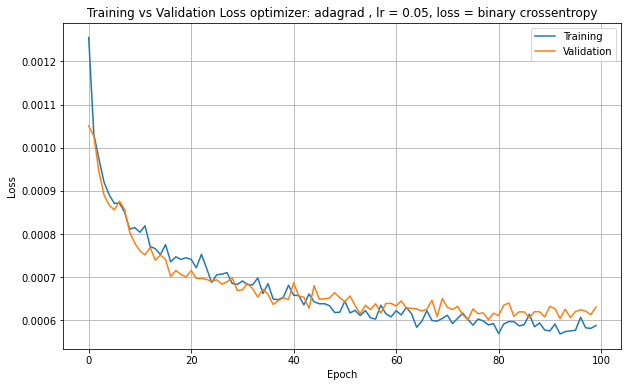

2020-05-26 16:03:11.046273: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-26 16:03:11.058508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-26 16:03:11.058960: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-05-26 16:03:11.059014: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-26 16:03:11.059066: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-05-26 16:03:11.138215: I tensorflow/stream_executor/platform/def

In [6]:
model_1 = KMG1(X_train.shape[1])
model_1.fit(X_train, y_train, w_train, X_val, y_val, w_val, 100)
model_1.plot_training()

In [7]:
model_1.evaluate(X_test, y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      8587
           1       0.92      0.82      0.87      4977

    accuracy                           0.91     13564
   macro avg       0.91      0.89      0.90     13564
weighted avg       0.91      0.91      0.91     13564

Confussion Matrix
[[8225  362]
 [ 877 4100]]


In [8]:
model_1.evaluate_with_weights(X_test, y_test, w_test)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98 58.07117106215785
           1       0.86      0.82      0.84 6.264135779681156

    accuracy                           0.97 64.33530684183901
   macro avg       0.92      0.90      0.91 64.33530684183901
weighted avg       0.97      0.97      0.97 64.33530684183901

Confussion Matrix
[[57.20900781  0.86216325]
 [ 1.12197259  5.14216319]]


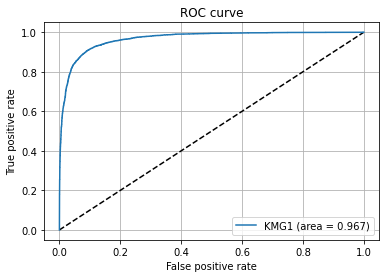

(array([0.        , 0.        , 0.        , ..., 0.99580762, 0.99580762,
        1.        ]),
 array([0.00000000e+00, 2.00924252e-04, 3.79746835e-02, ...,
        9.99799076e-01, 1.00000000e+00, 1.00000000e+00]),
 0.9668073931981842)

In [9]:
model_1.plot_roc(X_test, y_test)

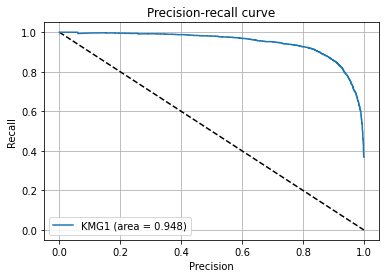

(array([0.36790361, 0.36785688, 0.36788408, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99799076e-01, 9.99799076e-01, ...,
        4.01848503e-04, 2.00924252e-04, 0.00000000e+00]),
 0.947673748141948)

In [10]:
model_1.plot_recall(X_test, y_test)

In [11]:
#model_1.save(data_path, "1")

modelo
modelo
historia
mas historia


Train on 40690 samples, validate on 13564 samples
Epoch 1/150
40690/40690 [==============================] - 9s 224us/step - loss: 0.0014 - val_loss: 0.0010
Epoch 2/150
40690/40690 [==============================] - 6s 138us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/150
40690/40690 [==============================] - 6s 138us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 4/150
40690/40690 [==============================] - 6s 137us/step - loss: 0.0010 - val_loss: 9.9975e-04
Epoch 5/150
40690/40690 [==============================] - 6s 138us/step - loss: 9.8534e-04 - val_loss: 9.6795e-04
Epoch 6/150
40690/40690 [==============================] - 6s 140us/step - loss: 9.6250e-04 - val_loss: 9.3800e-04
Epoch 7/150
40690/40690 [==============================] - 6s 139us/step - loss: 9.3539e-04 - val_loss: 9.1593e-04
Epoch 8/150
40690/40690 [==============================] - 6s 141us/step - loss: 9.1609e-04 - val_loss: 9.0106e-04
Epoch 9/150
40690/40690 [==============================] -

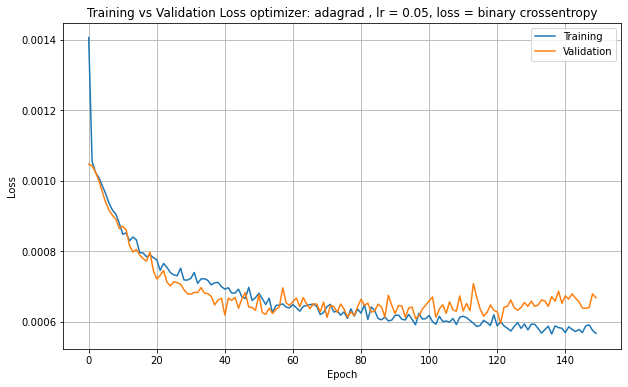

2020-05-26 21:25:38.689816: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-26 21:25:38.739278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-26 21:25:38.740570: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-05-26 21:25:38.740731: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-26 21:25:38.740894: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-05-26 21:25:38.921448: I tensorflow/stream_executor/platform/def

In [6]:
model_2 = KMG1(X_train.shape[1])
model_2.fit(X_train, y_train, w_train, X_val, y_val, w_val, 150)
model_2.plot_training()

In [7]:
model_2.evaluate(X_test, y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8587
           1       0.89      0.86      0.88      4977

    accuracy                           0.91     13564
   macro avg       0.91      0.90      0.90     13564
weighted avg       0.91      0.91      0.91     13564

Confussion Matrix
[[8077  510]
 [ 705 4272]]


In [8]:
model_2.evaluate_with_weights(X_test, y_test, w_test)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98 58.07117106215785
           1       0.77      0.86      0.81 6.264135779681156

    accuracy                           0.96 64.33530684183901
   macro avg       0.88      0.91      0.90 64.33530684183901
weighted avg       0.96      0.96      0.96 64.33530684183901

Confussion Matrix
[[56.50640222  1.56476884]
 [ 0.89940023  5.36473555]]
